In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('regression_data1.csv')

### Activity 1
Refer to the files_for_activities/regression_data1.csv file. (The same file used in the class example.)

- Draw a box plot for the IC2.
- Print the descriptive statistics for IC2.
- Remove the outliers from the column IC2.


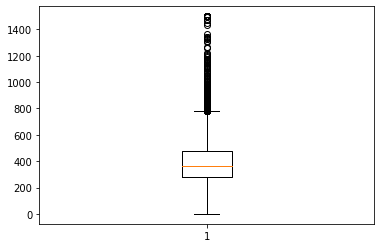

In [4]:
plt.boxplot(data['IC2'])
plt.show()

In [10]:
data.describe()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,11.836754,15.624344
std,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,10.147951,12.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,7.181818,10.000000
50%,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,10.000000,13.000000
75%,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,14.500000,20.000000
max,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,450.000000,200.000000


In [5]:
data.describe()['IC2']

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [6]:
iqr = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25) # data['IC1'].quantile(0.75)
iqr

198.0

In [7]:
np.percentile(data['IC2'],25),np.percentile(data['IC2'],75)

(283.0, 481.0)

In [8]:
upper_limit = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC2'],25) - 1.5*iqr
upper_limit, lower_limit

(778.0, -14.0)

In [11]:
data.loc[data['IC2'] > upper_limit, 'IC2']

85       936
152      880
169     1044
172      939
208      824
        ... 
4608    1077
4694     943
4741     911
4773    1022
4816     823
Name: IC2, Length: 173, dtype: int64

In [ ]:
# method 1
data = data[(data['IC2'] > lower_limit) & (data['IC2'] < upper_limit)]

# method 2
data.loc[data['IC2'] > upper_limit, 'IC2'] = upper_limit
data.loc[data['IC2'] < lower_limit, 'IC2'] = lower_limit

### Activity 2
Keep using the same file.

- Repeat the process(log transformation) for the column IC3. Define the function again yourself.
- Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

In [17]:
data1 = data.copy()

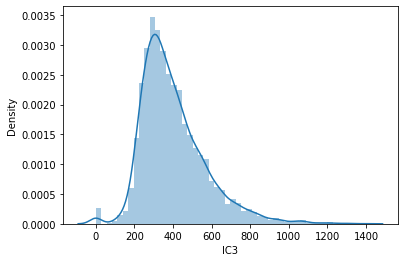

In [18]:
sns.distplot(data1['IC3'])
plt.show()

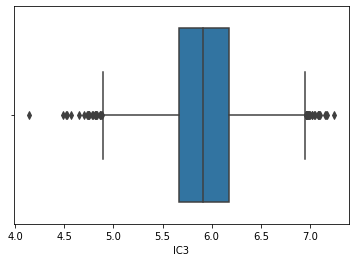

In [30]:
sns.boxplot(data1['IC3'], whis=1.5)
plt.show()

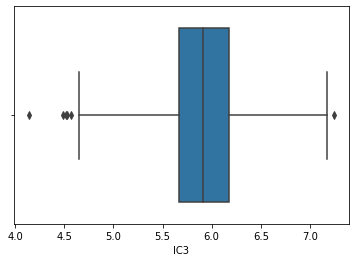

In [31]:
sns.boxplot(data1['IC3'], whis=2)
plt.show()

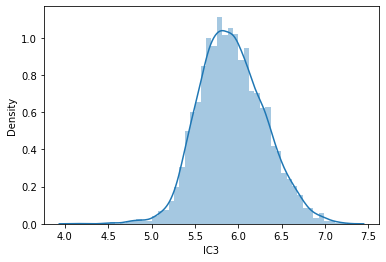

In [20]:
data1 = data.copy()

# we are replacing the -inf values after we take logarithm of 0
# we'll test 2 options (replacing -inf by zero or by the mean of the column after the log transformation)

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

data1['IC3'] = data1['IC3'].apply(log_lmbda)

data1['IC3'] = data1['IC3'].fillna(np.mean(data1['IC3']))

sns.distplot(data1['IC3'])
plt.show()

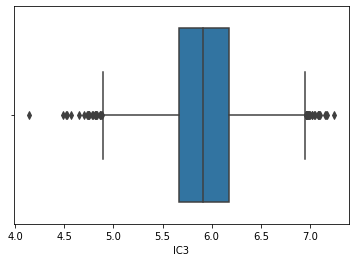

In [21]:
sns.boxplot(data1['IC3'])
plt.show()

### Activity 3
Repeat the same steps for column IC5 for box-cox transformation.


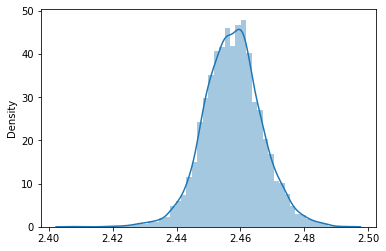

In [35]:
# BoxCox transformation

# Since this is median household income, we can filter out negative values:
# if you do not want to lose this data, replace it with the mean of the column

data1 = data.copy()

data1['IC5'] = np.where(data1['IC5']<=0, np.NAN, data1['IC5'])

data1['IC5'] = data1['IC5'].fillna(data1['IC5'].mean())

transformed_data, _ci = stats.boxcox(data1['IC5'])

sns.distplot(transformed_data)
plt.show()

### Activity 4
Keep using the same file (files_for_activities/regression_data.csv) for this exercise.

- Load data regression_data.csv.
- Select 3 numeric columns.
- Plot distributions.
- Normalize.
- Plot new distributions.

In [3]:
data=pd.read_csv('regression_data.csv')

In [5]:
data2=data._get_numeric_data().iloc[:, 0:3].dropna()

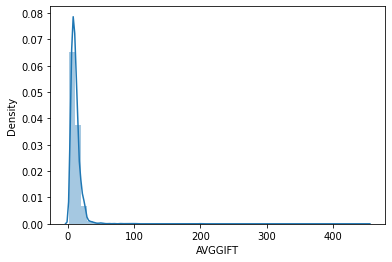

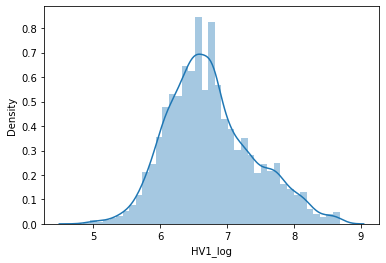

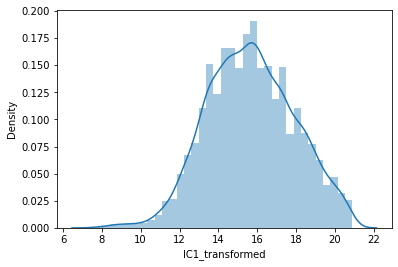

In [6]:
for i in range(3):
    sns.distplot(data2.iloc[:,i])
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(data2)
x_standardized = transformer.transform(data2)

data3=pd.DataFrame(x_standardized)
data3.head()

,0,1,2
0,0.375828,1.557442,0.744945
1,-0.854260,-0.831912,0.248137
2,-0.416499,0.562039,1.059285
3,-0.495732,-1.485903,-1.758861
4,-0.289161,-0.161855,-1.420443


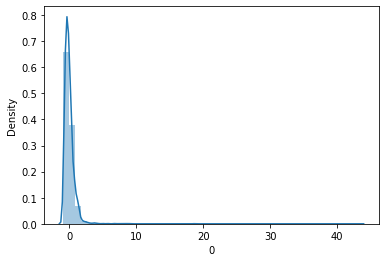

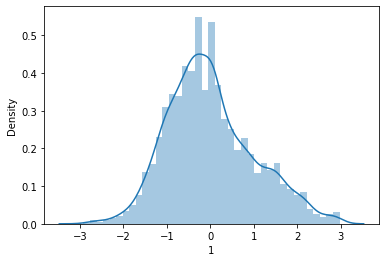

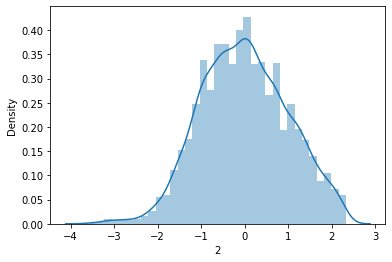

In [9]:
for i in range(3):
    sns.distplot(data3.iloc[:,i])
    plt.show()